In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

/tmp/ipykernel_27182/1038753746.py:20: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0, t, limit=1000, args=(t,F))[0]
/tmp/ipykernel_27182/1038753746.py:20: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, 0, t, limit=1000, args=(t,F))[0]


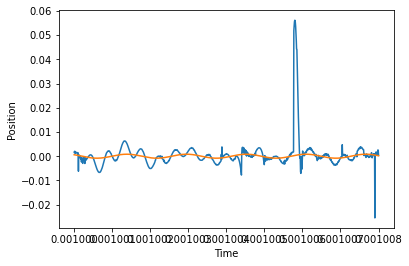

In [135]:
#model spring being driven by light wave
#calculate radiated fields

#make a graph of position vs time of electron being driven by light wave

q = -1.6*10**(-19) #coulombs
m = 9.11*10**(-31) #kilograms
w0 = 1.42*10**7 #1.42 GHz, natural freq of electron of Hydrogen
E_0 = 0.8694 #V/m, got from some 
w = 4*10**6 #frequency of light


def x(t):
    def F(t):
        return q*E_0*np.cos(w*t)

    def integrand(t_p,t,F):
        return (F(t_p)/(m*w0))*np.sin(w0*(t-t_p)) #greens function

    return integrate.quad(integrand, 0, t, limit=1000, args=(t,F))[0]

tstart = 10**-3
tend = 10**-3 + 8*10**(-6)
ts = np.linspace(tstart,tend,1000)
x = [x(t) for t in ts] #not good becuase not steady state solution, should plot that and compare...

x2 = q*E_0/(m * (w0**2 - w**2))
plt.plot(ts,x)
plt.plot(ts, x2*np.cos(w*ts))
plt.ylabel('Position')
plt.xlabel('Time')
plt.show()